In [18]:
import tensorflow as tf
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
drive.mount('gdrive')


Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [0]:
storage_root = 'gdrive/My Drive'
import os
#!ls 'gdrive/My Drive'
#!ls /content
tensorboard_root = filename = os.path.join(storage_root,'tensorboard_logs')
#!ls 'gdrive/My Drive'

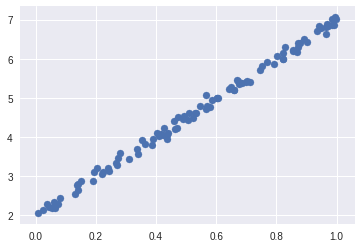

In [3]:
N = 100
w_true = 5.
b_true = 2.
noise_scale = 0.1
x_s = np.random.uniform(size = (N,1))
y_s = w_true*x_s + b_true + np.random.normal(scale= noise_scale, size = (N,1))
plt.scatter(x_s, y_s)


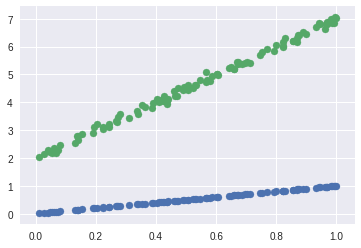

In [4]:
x = tf.placeholder(dtype = tf.float32, shape = (None,1))
w = tf.Variable(1.)
b = tf.Variable(0.)

y_hat = w*x + b

sess = tf.Session()
sess.run(tf.global_variables_initializer())
est = sess.run(y_hat, feed_dict = {x:x_s})

plt.scatter(x_s, est)
plt.scatter(x_s, y_s)








In [0]:
n_ep = 10000
y = tf.placeholder(tf.float32, (None,1))
loss = tf.reduce_mean(tf.squared_difference(y_hat, y))
lr = 0.01

In [0]:
lr = 0.01
train_op = tf.train.AdamOptimizer(lr).minimize(loss)

sess.run(tf.global_variables_initializer())
for i in range(n_ep):
  sess.run(train_op, feed_dict = {x:x_s})
 
print(w.eval(session=sess))
print(b.eval(session=sess))

est = sess.run(y_hat, feed_dict = {x:x_s})
plt.scatter(x_s, est)
plt.scatter(x_s, y_s)


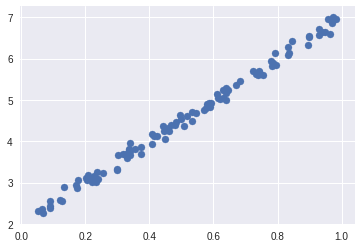

In [20]:
N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N,1))
y_np = np.reshape(w_true*x_np + b_true + noise, (N,))
plt.scatter(x_np, y_np)

In [9]:
!pip install -U tensorboardcolab

  Running setup.py bdist_wheel for tensorboardcolab ... - done
  Stored in directory: /root/.cache/pip/wheels/ab/74/02/cda602d1dc28b2f12eab313c49b9bfa14d6371326bc2590e06
Successfully built tensorboardcolab


In [21]:

from tensorboardcolab import *
import shutil

#clean out the directory
graph_dir = os.path.join(tensorboard_root,'tensorboard_logs')
shutil.rmtree(graph_dir, ignore_errors=True)
os.mkdir(graph_dir)

tf.reset_default_graph()

#will start the tunneling and will print out a link:
tbc=TensorBoardColab()

n_steps = 10000
N = 100
w_true = 5.
b_true = 2.
noise_scale = .1
lr = .001

x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N,1))
y_np = np.reshape(w_true*x_np + b_true + noise, (-1,))


with tf.name_scope('placeholders'):
  x = tf.placeholder(tf.float32, shape=(None,1), name='x')
  y = tf.placeholder(tf.float32, (None,), name='y')

with tf.name_scope('variables'):
  w = tf.Variable(tf.random_normal((1,1)), name='W')
  b = tf.Variable(tf.random_normal((1,)), name = 'b')
 
with tf.name_scope('loss'):
  y_hat = tf.matmul(x,w) + b
  loss = tf.reduce_mean(tf.square (y_hat- y))  

with tf.name_scope('optim'):
  train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)

with tf.name_scope('summaries'):
  tf.summary.scalar('loss', loss)
  tf.summary.scalar('w', w[0,0])
  tf.summary.scalar('b', b[0])
  merged = tf.summary.merge_all()
train_writer = tbc.get_writer();

with tf.Session() as sess:
  train_writer.add_graph(sess.graph)
  sess.run(tf.global_variables_initializer())
  for i in range(n_steps):
    feed_dict = {x:x_np, y:y_np}
    _, summary, the_loss = sess.run([train_op, merged, loss], feed_dict=feed_dict)
    #print('step: %d, loss: %f'%(i, the_loss))
    train_writer.add_summary(summary, i)
  est = sess.run(y_hat, feed_dict = {x:x_np})
  print('the finale loss is: %f'%(the_loss))
  #plt.scatter(x_np, est)
  #plt.scatter(x_np, y_np)






train_writer.flush();
tbc.close()

Wait for 8 seconds...
TensorBoard link:
http://7d0f6fe1.ngrok.io
the finale loss is: 2.136891


In [0]:
#If using Keras
#from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
#tbc=TensorBoardColab()
#model.fit(......,callbacks=[TensorBoardColabCallback(tbc)])

In [0]:
N = 100.
x_zeros = np.random.multivariate_normal(mean=np.array((-1.,-1.)),
                                        cov=2.*np.eye(2),
                                        size=int(N/2,))
y_zeros = np.zeros((int(N/2),))

x_ones = np.random.multivariate_normal(mean=np.array((1.,1.)),
                                       cov=.1*np.eye(2),
                                       size=(int(N/2),))
y_ones = np.ones((int(N/2),))

x_np = np.vstack([x_zeros,x_ones])
y_np = np.vstack([y_zeros,y_ones])

#print(x_np)

#plt.scatter(x_zeros[0], x_zeros[1])
#plt.figure()
#plt.hist(x_zeros[0])
#plt.scatter(x_ones[0], x_ones[1])